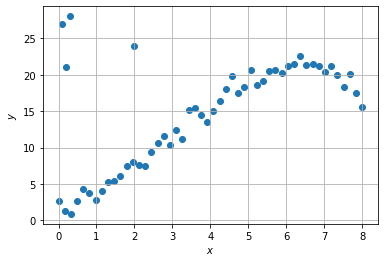

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cvx
from l1 import l1

x = np.linspace(0,8,50).reshape((-1,1))
z = 1*np.random.randn(np.size(x)).reshape((-1,1))
y = -.15*x**3 + 1.4*x**2 + .2*x + 2 +z

# add some outliers
x = np.vstack((x,[[.1],[.2],[.3],[2]]))
y = np.vstack((y,[[27],[21],[28],[24]]))

plt.scatter(x,y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

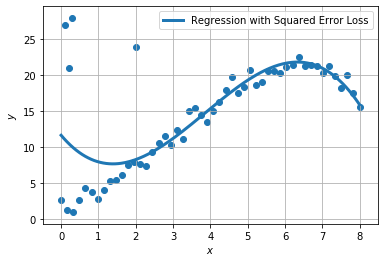

In [201]:
X = np.hstack((x**0,x**1,x**2,x**3))
# find least squares estimate for X
w_ls = np.linalg.inv(X.T@X)@X.T@y

xx = np.linspace(0,8,200).reshape((-1,1))
XX =  np.hstack((xx**0,xx**1,xx**2,xx**3))
plt.plot(xx, XX@w_ls, linewidth=3)
#plt.scatter(x[:-4],y[:-4])
#plt.scatter(x[-4:],y[-4:],color='red')
plt.scatter(x,y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.legend(["Regression with Squared Error Loss"])
plt.show()

     pcost       dcost       gap    pres   dres   k/t
 0:  1.6495e+02  6.8276e+01  1e+02  2e-17  3e-13  1e+00
 1:  1.6687e+02  7.5202e+01  9e+01  5e-16  3e-12  9e-01
 2:  1.6134e+02  8.9925e+01  7e+01  7e-16  5e-12  7e-01
 3:  1.4028e+02  1.0943e+02  3e+01  3e-16  5e-12  3e-01
 4:  1.3337e+02  1.1516e+02  2e+01  4e-16  3e-12  2e-01
 5:  1.2644e+02  1.1920e+02  7e+00  4e-16  6e-13  7e-02
 6:  1.2260e+02  1.2152e+02  1e+00  2e-16  2e-13  1e-02
 7:  1.2212e+02  1.2186e+02  3e-01  3e-16  6e-14  3e-03
 8:  1.2204e+02  1.2193e+02  1e-01  3e-16  2e-14  1e-03
 9:  1.2198e+02  1.2197e+02  2e-02  4e-16  2e-13  1e-04
10:  1.2197e+02  1.2197e+02  2e-03  2e-16  1e-12  2e-05
11:  1.2197e+02  1.2197e+02  1e-04  2e-16  2e-12  1e-06
Optimal solution found.


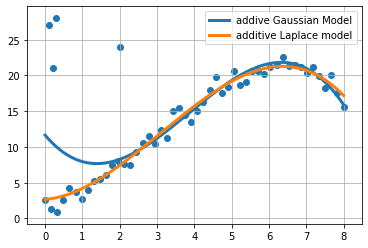

In [202]:
# note that you must have CVXOPT installed
# and place the L1 python solver l1.py in your working directory
wl1 = l1(cvx.matrix(X),cvx.matrix(y))

plt.plot(xx, XX@w, linewidth=3)
plt.plot(xx, XX@wl1, linewidth=3)

plt.scatter(x,y)
plt.legend(['addive Gaussian Model', 'additive Laplace model' ])
plt.grid()